In [62]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [63]:
vcfpath = '/home/croth/Desktop/QTL/Cdx-fine-mapped-snps-indels.csv.gz'

In [64]:
vcf = pd.read_csv(vcfpath,index_col=0)

In [65]:
vcf.head()

,Chrom,Pos,Ref,Alt,181,83,164,51,49,186,...,155,184,58,41,71,177,30,50,43,Af
0,Chr01,130458,G,T,0,1,1,0,0,1,...,1,0,1,1,0,0,1,1,1,0.544554
1,Chr01,130728,CAAAAAAAACAATATAT,CAAAAAAAAACAATATAT,0,1,1,0,0,1,...,1,0,1,1,0,0,1,1,1,0.544554
2,Chr01,130788,A,T,0,1,1,0,0,1,...,1,0,1,1,0,0,1,1,1,0.544554
3,Chr01,130851,ACTCCTTCTCCTTCT,ACTCCTTCTCCTTCTCCTTCT,0,1,1,0,0,1,...,1,0,1,1,0,0,1,1,1,0.544554
4,Chr01,130939,C,T,0,1,1,0,0,1,...,1,0,1,1,0,0,1,1,1,0.544554


In [66]:
chrom = 'Chr07'
qtl_ci = (630000,707000)

In [67]:
qtl = vcf[(vcf.Chrom==chrom) & 
          (vcf.Pos>=np.min(qtl_ci)) & 
          (vcf.Pos<=np.max(qtl_ci))]

In [68]:
segregants = qtl.columns.tolist()[4:-1]

In [69]:
len(segregants)

101

In [70]:
segregants[:5],segregants[-5:]

(['181', '83', '164', '51', '49'], ['71', '177', '30', '50', '43'])

In [75]:
recs = qtl[segregants].diff(axis=0).abs().sum()

In [81]:
rec_segs = np.array(segregants)[(recs > 0) & 
                                (qtl[segregants].sum()<300)]

In [82]:
rec_segs

array(['171', '129', '184'], dtype='<U3')

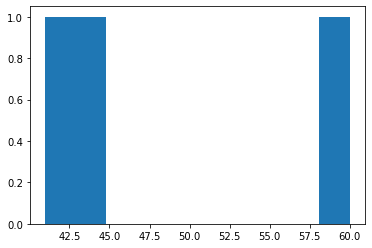

In [83]:
plt.hist(qtl[rec_segs].sum().values);

In [84]:
info_cols = [c for c in vcf.columns if c not in segregants]

In [85]:
rec_save_cols = info_cols + list(rec_segs)

In [86]:
qtl[rec_save_cols].to_csv('/home/croth/crypto-QTL-paper/Ameoba_chromosome_7_QTL_Finemapped.csv',
                          index=True)